In [2]:
%matplotlib inline
    
import numpy as np
from scipy import signal, special
import matplotlib.pyplot as plt

# Sinus

$$
x(t) = A sin(\omega t + \omega_0)
$$

where $\omega= 2 \pi / T = 2 \pi f$


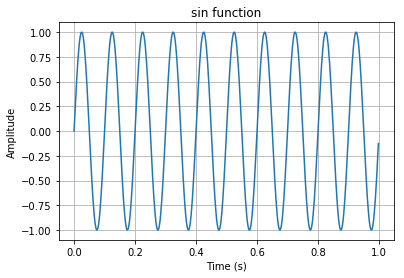

In [5]:
A = 1.0
frequency = 10

w = 2.0 * np.pi * frequency
w0 = 0.0

start = 0.0
stop = 1.0
sampling = 0.002

x = np.arange(start, stop, sampling)
sig = A * np.sin(w * x + w0)

# figure
figure = plt.figure()

plt.grid(True)

plt.title("sin function")
plt.plot(x, sig)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Convolution

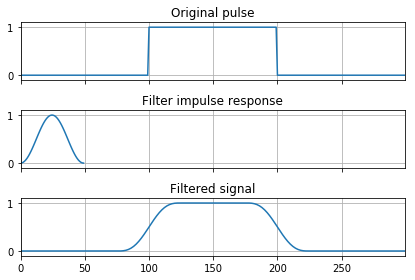

In [7]:
%matplotlib inline

sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)

filtered = signal.convolve(sig, win, mode='same') / sum(win)

# figure
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)

ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.grid(True)
ax_orig.margins(0, 0.1)

ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.grid(True)
ax_win.margins(0, 0.1)

ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.grid(True)
ax_filt.margins(0, 0.1)

fig.tight_layout()
fig.show()

In [ ]:
# Dirac

In [ ]:
# Plot the impulse response of a 4th-order Butterworth lowpass filter:

imp = signal.unit_impulse(100, 'mid')
b, a = signal.butter(4, 0.2)

response = signal.lfilter(b, a, imp)

# figure
fig = plt.figure()

xrange = np.arange(-50, 50)
plt.plot(xrange, imp)
plt.plot(xrange, response)

plt.margins(0.1, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Ricker wavelet

The Ricker wavelet in the time domain (Ricker, 1953) is defined as  

$$
r(\tau)=(1 − \frac{ω^2_p}{2} \tau^2) \exp(− ω^2_p \tau^2),
$$

where $\tau$ is the time, and $\omega_p$ is the most energetic frequency (in radians per second). 

Scipy models the Ricker function as:

$$
r(x) = A (1 - x^2/a^2) \exp(-x^2/2 a^2),
$$
where $A = 2 / \sqrt(3a) \pi^{(1/4)}$.

## time domain

$$
A =  (1 - 2 \pi^2 f^2 t^2) e^{-\pi^2 f^2 t^2}
$$

width=5.6382309299338775


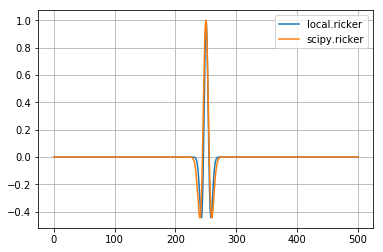

In [53]:
def ricker(frequency, length=0.128, dt=0.001):
    t = np.arange(-length/2, (length-dt)/2, dt)
    w = np.pi * f * t
    y = (1.0 - 2.0 * w**2) * np.exp(-w**2)
    return t, y
 

n_sample = 501
frequency = 40.0
width = n_sample * np.sqrt(2.0) / (np.pi * frequency) 

print("width={}".format(width))

t, w = ricker(frequency, length=1.002, dt=0.002)

factor = 0.5 * np.sqrt(3.0 * width) * np.pi**(0.25)
ricker2 = factor * signal.ricker(n_sample, width)

# figure
figure = plt.figure()

plt.grid(True)

plt.plot(range(0, 501), w, label='local.ricker')
plt.plot(ricker2, label='scipy.ricker')

plt.legend()
plt.show()

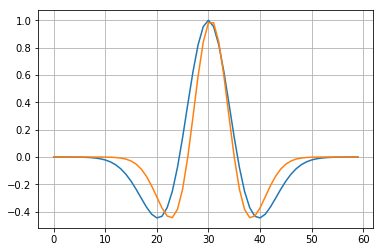

In [54]:
figure = plt.figure()

plt.grid(True)
plt.plot(ricker2[220:280])
plt.plot(w[220:280])

plt.show()

In [59]:
start = -3.0
stop = 3.0
step = 0.002

x = np.linspace(-3.0, 3.0, num=int((stop-start) / step) + 1)
print(len(x))
print(x)



3001
[-3.    -2.998 -2.996 ...  2.996  2.998  3.   ]


## Frequency domain

# Sinus cardinal

The sinc function is 

$$
sinc(x) = \frac{sin(\pi x)}{\pi x}
$$

In [ ]:
x = np.linspace(-4.0, 4.0, 81)
sig = special.sinc(x)

fig = plt.figure()
plt.grid(True)
plt.plot(x, sig)
plt.title("Sinc Function")
plt.ylabel("Amplitude")
plt.xlabel("X")

plt.show()

In [ ]:
image = misc.face(gray=True)
w = np.zeros((50, 50))
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(image, w)

plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

In [ ]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()